# **Exercise 1: Linear Regression Implementation**


**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Load Dataset**

In [ ]:
dataset = pd.read_csv("/content/datasets_house_prices.csv")
print(dataset.head(5))
dataset.shape

   Size (sqft)  Bedrooms  Age  Proximity to Downtown (miles)         Price
0         3974         1   97                       2.032719  1.162771e+06
1         1660         5   88                      23.695207  4.900021e+05
2         2094         4   49                       6.440232  6.400737e+05
3         1930         2   28                       8.129315  5.637881e+05
4         1895         1   56                       5.358837  5.651289e+05


(1000, 5)

In [ ]:
print(dataset.isnull().sum())

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


**Normalize the features**

In [ ]:
dataset[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']] = (
    dataset[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']] - dataset[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']].min()
) / (dataset[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']].max() - dataset[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']].min())


**Model Implementation**

In [ ]:
X = dataset['Size (sqft)'].values
y = dataset['Price'].values

n = len(X)
sum_x = np.sum(X)
sum_y = np.sum(y)
sum_xy = np.sum(X * y)
sum_x_squared = np.sum(X ** 2)

m = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x ** 2)
b = (sum_y - m * sum_x) / n

print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

Slope (m): 957261.3251088181
Intercept (b): 231180.30562681888


**Function to predict house price based on input size**

In [ ]:
def predict_price(size):
    return m * size + b

test_size = 3000
predicted_price = predict_price(test_size)
print(f"Predicted price for house size {test_size} sq.ft: {predicted_price}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_train = len(X_train)
sum_x_train = np.sum(X_train)
sum_y_train = np.sum(y_train)
sum_xy_train = np.sum(X_train * y_train)
sum_x_squared_train = np.sum(X_train ** 2)

m_train = (n_train * sum_xy_train - sum_x_train * sum_y_train) / (n_train * sum_x_squared_train - sum_x_train ** 2)
b_train = (sum_y_train - m_train * sum_x_train) / n_train

print(f"Training Slope (m): {m_train}")
print(f"Training Intercept (b): {b_train}")

Predicted price for house size 3000 sq.ft: 2872015155.632081
Training Slope (m): 957229.6854309321
Training Intercept (b): 230980.18650331


**Update predict_price function to use training set values**

In [ ]:
def predict_price_train(size):
    return m_train * size + b_train

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

**Predictions on the training set**

In [ ]:
y_train_pred = [predict_price_train(x) for x in X_train]
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"MSE on training data: {mse_train}")

MSE on training data: 253576579.8108736


**Predictions on the testing set**

In [ ]:
y_test_pred = [predict_price_train(x) for x in X_test]
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"MSE on testing data: {mse_test}")

MSE on testing data: 253668187.22040227


**Plot the regression line along with test data points**

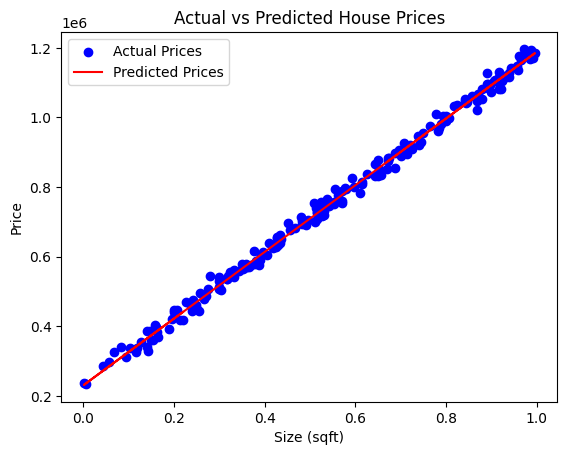

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, [predict_price_train(x) for x in X_test], color='red', label='Predicted Prices')
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.title('Actual vs Predicted House Prices')
plt.legend()
plt.show()

**Summarize Report**

The data set presented includes many characteristics such as the size of the house, the number of rooms, the age of the house, the proximity to the city and the price of that house.

First,checked for missing values ​​in the dataset. Fortunately, there are no missing values, so no redistribution. Using Min-Max normalization, characteristics (house size, number of rooms, age of the house, proximity to the city) are determined. This ensured that the conditions were consistent and prevented certain conditions from affecting the model.

We implemented a manual regression model without using built-in libraries such as Scikit-learn. The procedure includes:

Calculation of the slope and intercept of the regression line using least squares methods. These parameters define the relationship between home size and price and allow us to predict prices.

Final parameters:Elevation (m): 957261.33 Distance (b): 231180.31 A prediction function was written to estimate the house price based on the specified size.

The dataset was split into training and test sets (80% training, 20% testing) to evaluate the model. The training data were used to fit a linear regression model, where:Increment on training data (m): 957229.69 Intercept on training data (b): 230980.19 Using these parameter we successfully predict house prices for the data we marked as a new list.

**Conclusion**

A manually implemented linear regression model was able to predict real estate prices with reasonable accuracy. The close approximation between the actual and predicted costs was confirmed by plotting the regression line against the actual data points..

**Challenges & Solutions**

Adjust: In the beginning, different scales apply to the model. We did this using Min-Max normalization.
Accuracy of the model: The high values ​​of MSE can be attributed to the nature of house prices, and the model can be improved by including more features, to adjust or meta-parameters..